# Titanic - Machine Learning from Disaster
Start here! Predict survival on the Titanic and get familiar with ML basics

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def cat_plot(x_col,data, y_col=None,  kind='box', hue='Survived',height=8,aspect=1, col=None):
    sns.catplot(x=x_col, y=y_col, data=data, kind=kind, hue=hue,height=height,aspect=aspect,col=col)

In [3]:
def plot_by_percent(column,df_train,labels=None):
    
    """
    Plot a column by percent
    """

    #Favour means Survival

    distinct_values = np.array(sorted(df_train[column].unique()))
    favour_to_total_each_class = []
    favour_to_total_people = []
    against_to_total_people = []
    for i in distinct_values:
        total_people_in_each_class = sum(df_train[column]==i)
        total_favour_in_each_class = sum(df_train[df_train[column]==i]['Survived'] ==1)
        total_against_in_each_class = total_people_in_each_class - total_favour_in_each_class
        favour_to_total_each_class.append(total_favour_in_each_class/total_people_in_each_class)
        favour_to_total_people.append(total_favour_in_each_class/df_train.shape[0])
        against_to_total_people.append(total_against_in_each_class/df_train.shape[0])
    print(type(favour_to_total_each_class),type(distinct_values))


    width = 0.35


    fig,ax = plt.subplots(1,2)
    
    reacts1 = ax[0].bar(distinct_values +width/2,1 - np.array(favour_to_total_each_class) , width, label='Died')
    reacts2 = ax[0].bar(distinct_values - width/2,favour_to_total_each_class ,width, label='Survived')
    #reacts1 = ax[0].count(df_train[column] )


    
    ax[0].bar_label(reacts1, padding=3,rotation=90)
    ax[0].bar_label(reacts2, padding=3,rotation=90)
    ax[0].legend(['Died','Survived'])
    ax[0].set_title("Percentage of people Died/Survived in each {}".format(column))
    ax[0].set_xticks(distinct_values, labels)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel("Percentage w.r.t each "+column)


    reacts3 = ax[1].bar(distinct_values + width/2,against_to_total_people , width, label='Died')
    reacts4 = ax[1].bar(distinct_values - width/2,favour_to_total_people ,width, label='Survived')
    

    ax[1].bar_label(reacts3, padding=3,rotation=90)
    ax[1].bar_label(reacts4, padding=3,rotation=90)
    ax[1].legend(['Died','Survided'])
    ax[1].set_title("Percentage of people Died/Survived w.r.t total people")
    ax[1].set_xticks(distinct_values,labels)
    ax[1].set_xlabel(column)
    ax[1].set_ylabel("Percentage w.r.t total people")

    fig.suptitle('Survived vs Died')
    fig.set_size_inches(20,8)
    fig.dpi = 400

In [4]:
def show_stats(col,data):
    uniq = sorted(data[col].unique())
    frame = pd.DataFrame(columns=['Survived','Died','Total','Survival Rate'])
    for i in uniq:
        total = sum(data[col]==i)
        survived = sum(data[data[col]==i]['Survived']==1)
        died = total - survived
        frame.loc[i] = [survived,died,total,survived/total]
    print(frame)
    del(frame)

In [5]:
df_train = pd.read_csv('data/for_eda_train.csv')
df_test = pd.read_csv('data/for_eda_test.csv')

In [6]:
df_train.shape

(891, 12)

In [7]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,1


In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.757634,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.670189,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.853125,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [9]:
abs(df_train.corr()['Survived']).sort_values()

PassengerId    0.005007
Family         0.016639
SibSp          0.035322
Age            0.080065
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Survived       1.000000
Name: Survived, dtype: float64

- Earlier we have created a new Feature called Family but it looks like that feature is not that much usefull, Hence After visualizing the data we will remove it.

<AxesSubplot:>

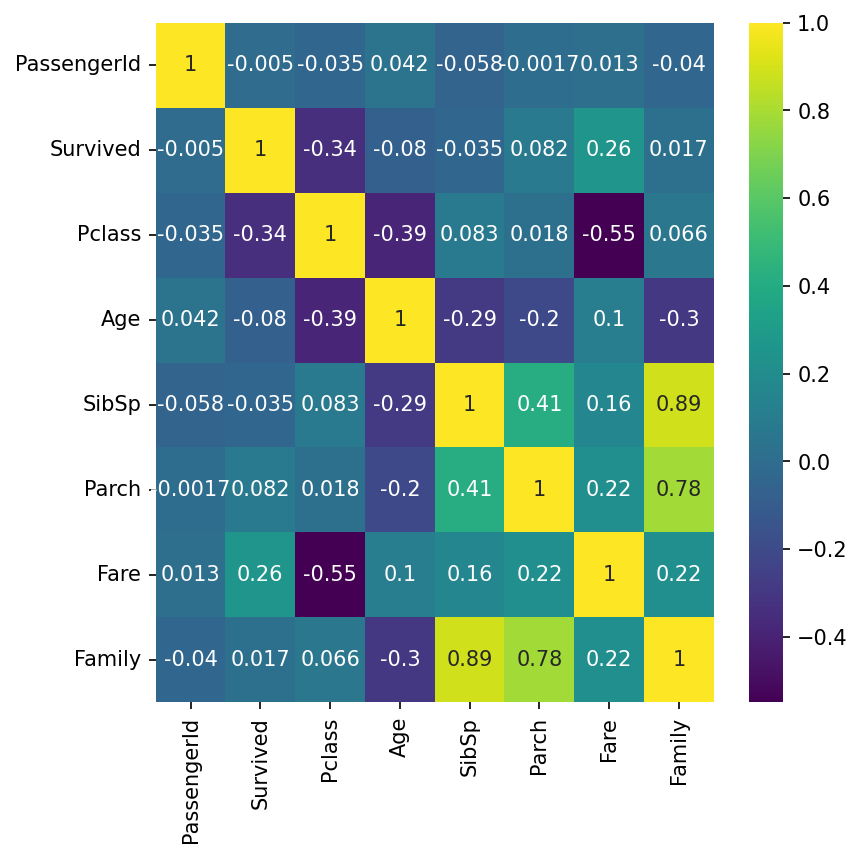

In [10]:
plt.figure(figsize=(6,6),dpi=150)
sns.heatmap(df_train.corr(), annot=True, cmap='viridis')

## Pclass

<class 'list'> <class 'numpy.ndarray'>


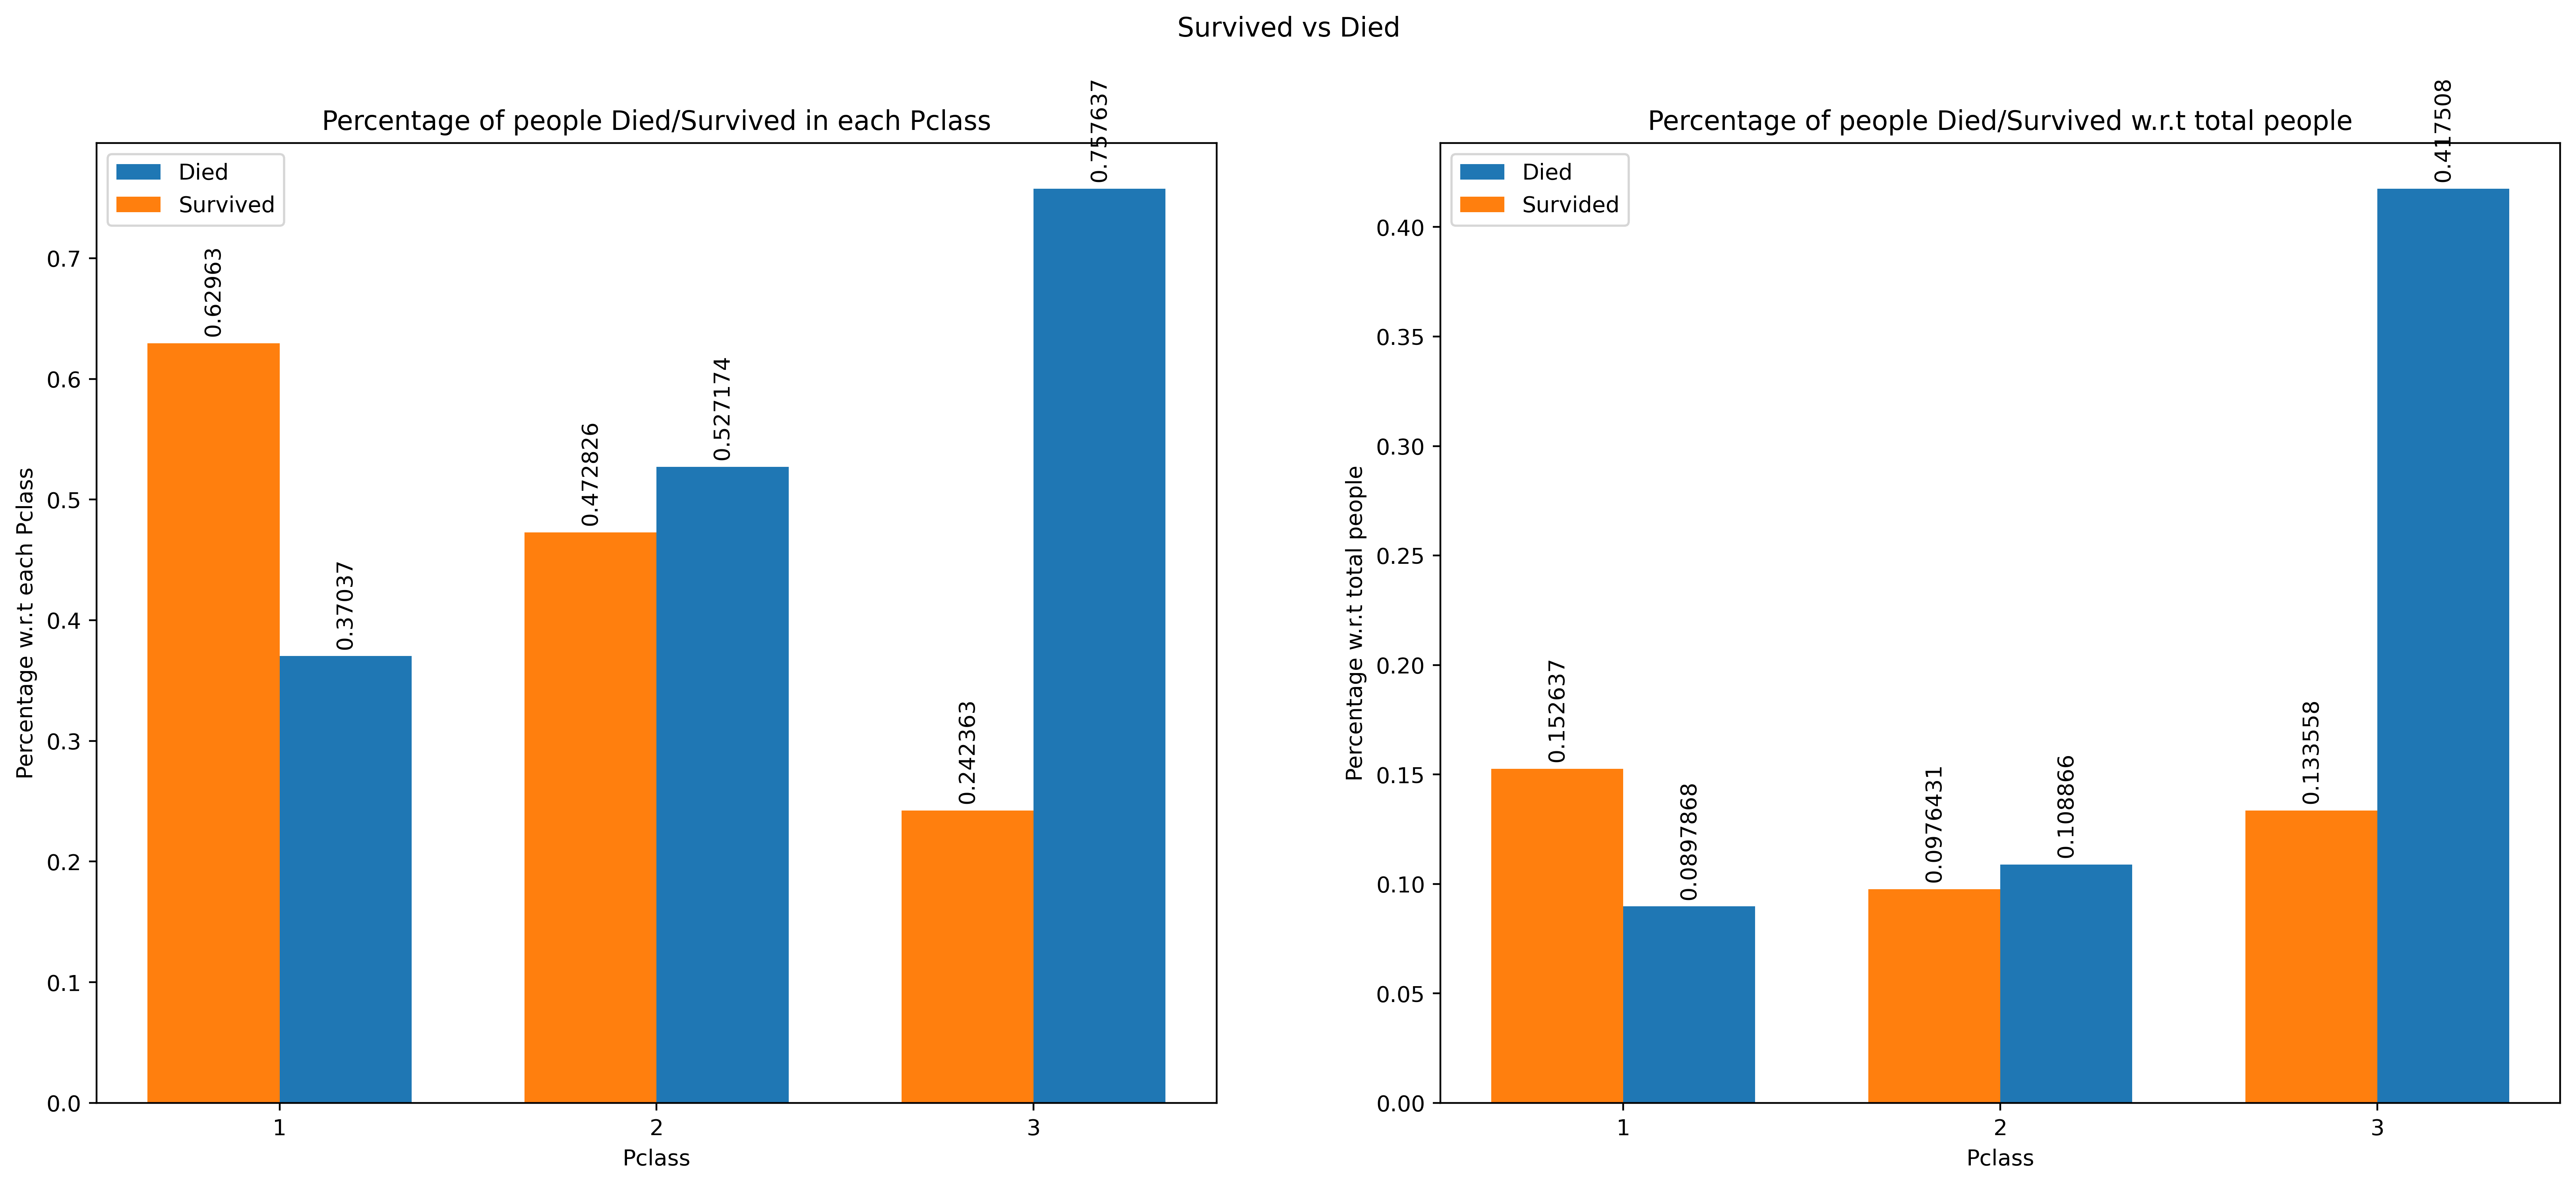

In [11]:
plot_by_percent('Pclass',df_train)

In [12]:
show_stats('Pclass',df_train)

   Survived   Died  Total  Survival Rate
1     136.0   80.0  216.0       0.629630
2      87.0   97.0  184.0       0.472826
3     119.0  372.0  491.0       0.242363


- Approx 55% People were in Pclass 3 and among them 75% died
- In Pclass 1 there was a Greater Probability of Survival as there approx 63% People Survived 
- In Pclass 2 approx 47% Survived

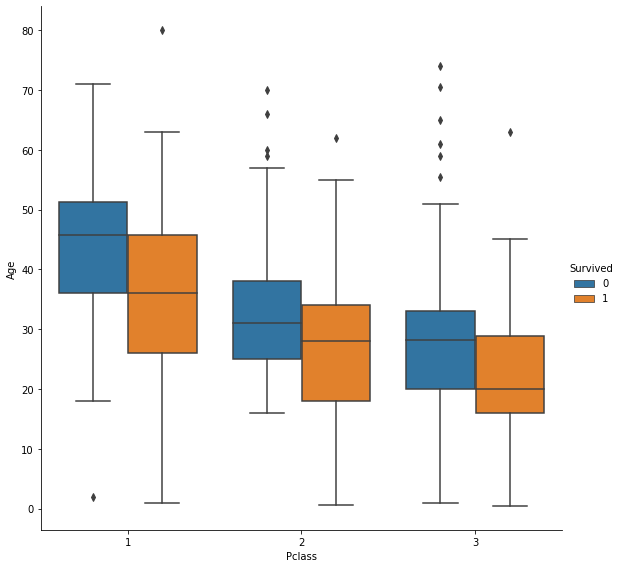

In [13]:
cat_plot(x_col="Pclass",y_col='Age',data=df_train)

- In Pclass 1 The average age of People was around 47 who died
- From each class the average Age of the Survived People was Less than the Average age of those who died

## Fare

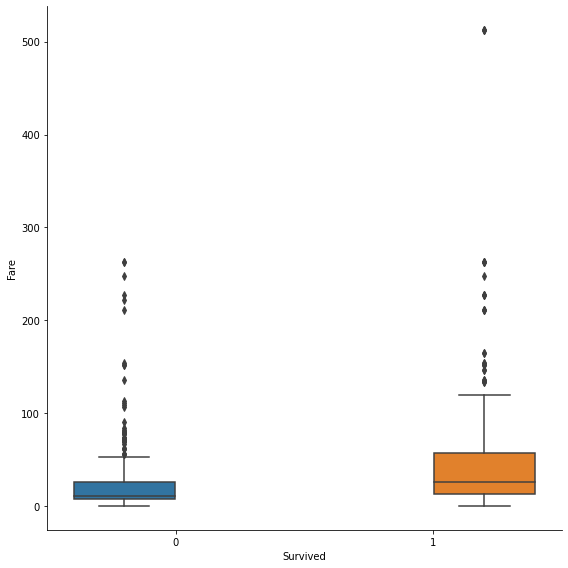

In [14]:
cat_plot(x_col="Survived",y_col='Fare',data=df_train)

- Average Fare paid by those who Survived was higher than those who died

<AxesSubplot:xlabel='Fare', ylabel='Count'>

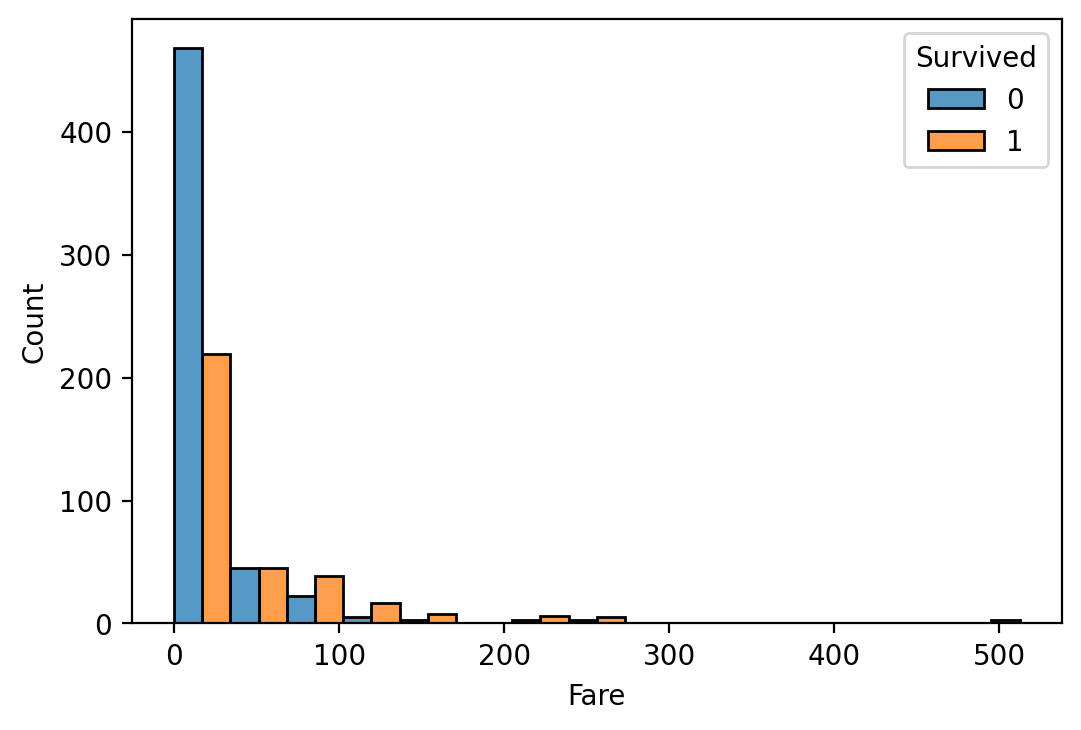

In [15]:
plt.figure(figsize=(6,4),dpi=200)
sns.histplot(x=df_train['Fare'], hue=df_train['Survived'],  bins=15,stat='count', multiple='dodge')

- Those who paid higher Fare were having a greater chance of survival

## Family / SibSp / Parch

### Family

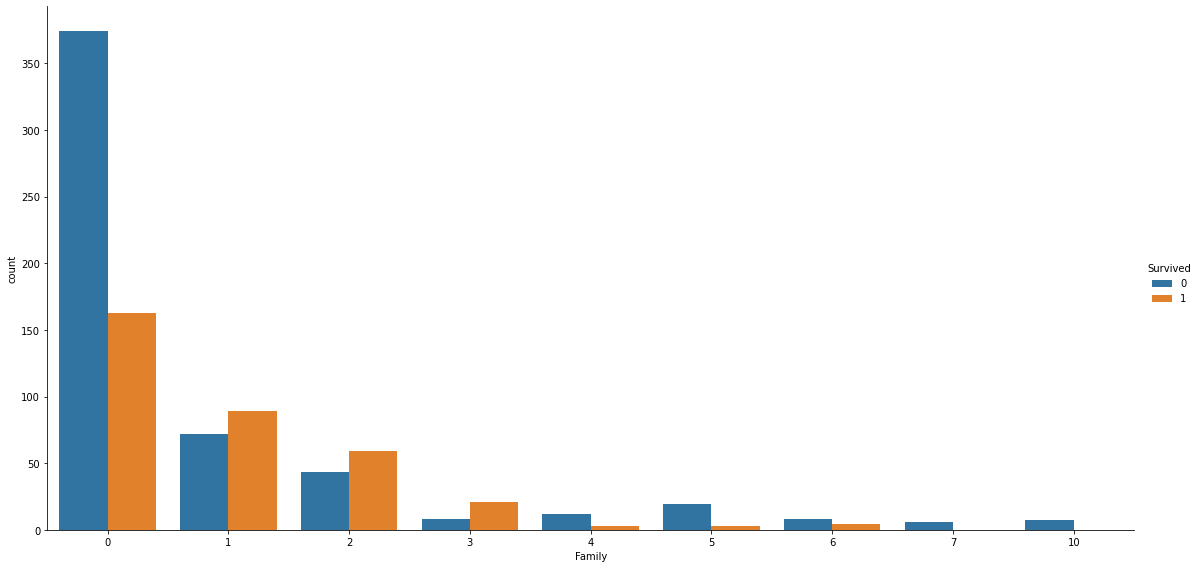

In [16]:
cat_plot(x_col='Family',data=df_train,kind="count",aspect=2)

In [17]:
show_stats('Family',df_train)

    Survived   Died  Total  Survival Rate
0      163.0  374.0  537.0       0.303538
1       89.0   72.0  161.0       0.552795
2       59.0   43.0  102.0       0.578431
3       21.0    8.0   29.0       0.724138
4        3.0   12.0   15.0       0.200000
5        3.0   19.0   22.0       0.136364
6        4.0    8.0   12.0       0.333333
7        0.0    6.0    6.0       0.000000
10       0.0    7.0    7.0       0.000000


- Those who were travelling with 1, 2 or 3 Family member were having a greater chance of survival
- Most were travelling Alone and approx 70% of them Died
- After analyzing the data we will remove the Family feature as it is not much correlated with the Survival

- Just for Analysing

In [18]:
def convert_Family(family):
    if family ==0:
        return "Alone"
    elif ((family > 0) & (family < 4)):
        return "Small"
    elif (family >= 4) & (family < 7):
        return "Medium"
    else:
        return "Large"

In [19]:
temp_family_group = df_train['Family'].apply(convert_Family)

In [20]:
temp_family_group.unique()

array(['Small', 'Alone', 'Medium', 'Large'], dtype=object)

In [21]:
temp_family_group = pd.concat([df_train['Survived'],temp_family_group],axis=1)

<AxesSubplot:xlabel='Family', ylabel='Count'>

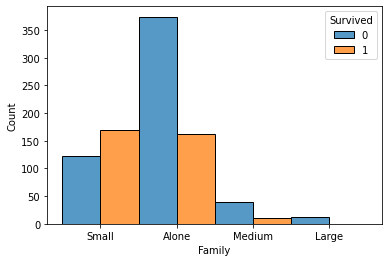

In [22]:
sns.histplot(x='Family',data=temp_family_group,stat='count', multiple='dodge',hue='Survived', binwidth=1)

In [23]:
show_stats('Family',temp_family_group)

        Survived   Died  Total  Survival Rate
Alone      163.0  374.0  537.0       0.303538
Large        0.0   13.0   13.0       0.000000
Medium      10.0   39.0   49.0       0.204082
Small      169.0  123.0  292.0       0.578767


- From Above it is clearly visible that most of the People were travelling Alone
- Who were travelling with Small Family were having a greater chance of survival (57%)
- Everyone who were travelling with Large Family Died

In [24]:
del(temp_family_group)

### SibSp

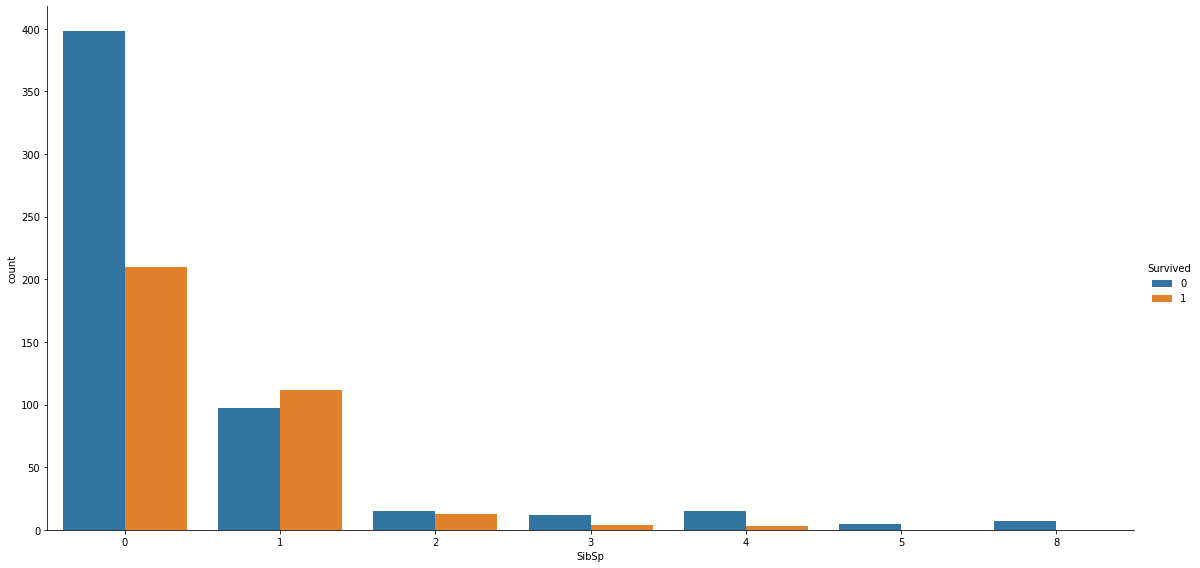

In [25]:
cat_plot(x_col='SibSp',data=df_train,kind="count",aspect=2)

In [26]:
show_stats('SibSp',df_train)

   Survived   Died  Total  Survival Rate
0     210.0  398.0  608.0       0.345395
1     112.0   97.0  209.0       0.535885
2      13.0   15.0   28.0       0.464286
3       4.0   12.0   16.0       0.250000
4       3.0   15.0   18.0       0.166667
5       0.0    5.0    5.0       0.000000
8       0.0    7.0    7.0       0.000000


- Those who were Travelling with 1 SibSp were having a greater chance of survival
- As the no. of SibSp increasing the Survival Chance is decreasing

### Parch

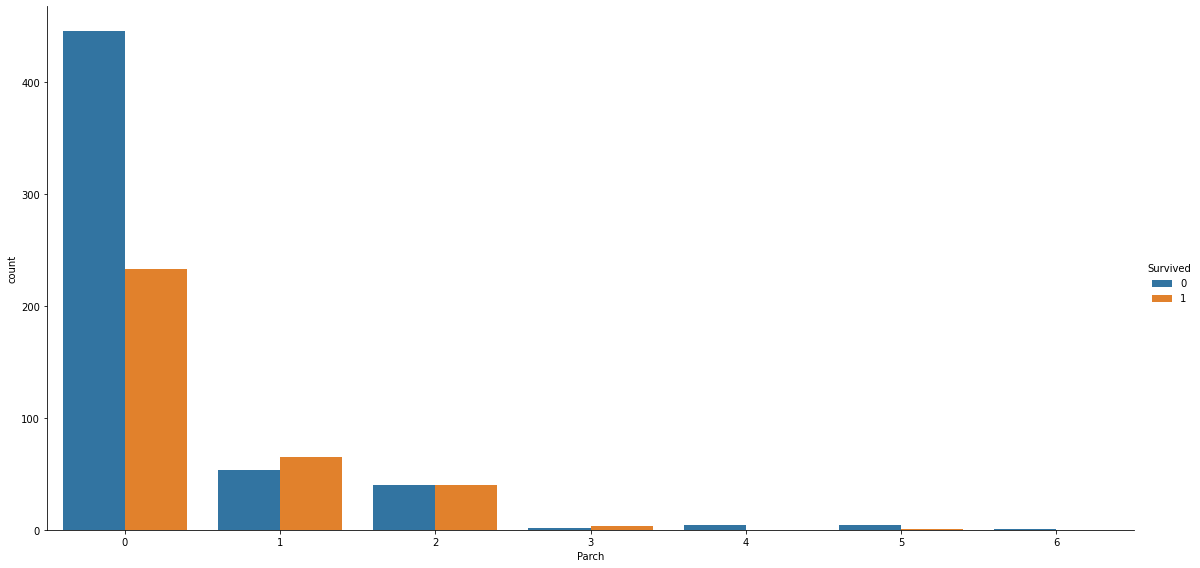

In [27]:
cat_plot(x_col='Parch',data=df_train,kind="count",aspect=2)

In [28]:
show_stats('Parch',df_train)

   Survived   Died  Total  Survival Rate
0     233.0  445.0  678.0       0.343658
1      65.0   53.0  118.0       0.550847
2      40.0   40.0   80.0       0.500000
3       3.0    2.0    5.0       0.600000
4       0.0    4.0    4.0       0.000000
5       1.0    4.0    5.0       0.200000
6       0.0    1.0    1.0       0.000000


- Same here those who were with 1 Parch were having a greater chance of survival
- little Strange there is a much more Survival Rate Spicke for Parch 3

In [29]:
((df_train['Parch'] ==3) & ( df_train['Survived'] ==1)).sum()/((df_train['Parch'] ==3).sum())*100

60.0

- Around 60% Survived who were with Parch ==3

In [30]:
df_train[(df_train['Parch'] ==3) & ( df_train['Survived'] ==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
437,438,1,2,"Richards, Mrs. Sidney (Emily Hocking)",female,24.0,2,3,18.7500,S,Mrs.,5
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,23.0000,S,Mrs.,4
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,19.2583,C,Mrs.,3


- All were Female and everyone Ticket's First Digit was 2

## Age

- There are few outliers whose fare is greater than $500.

<AxesSubplot:xlabel='Age', ylabel='Count'>

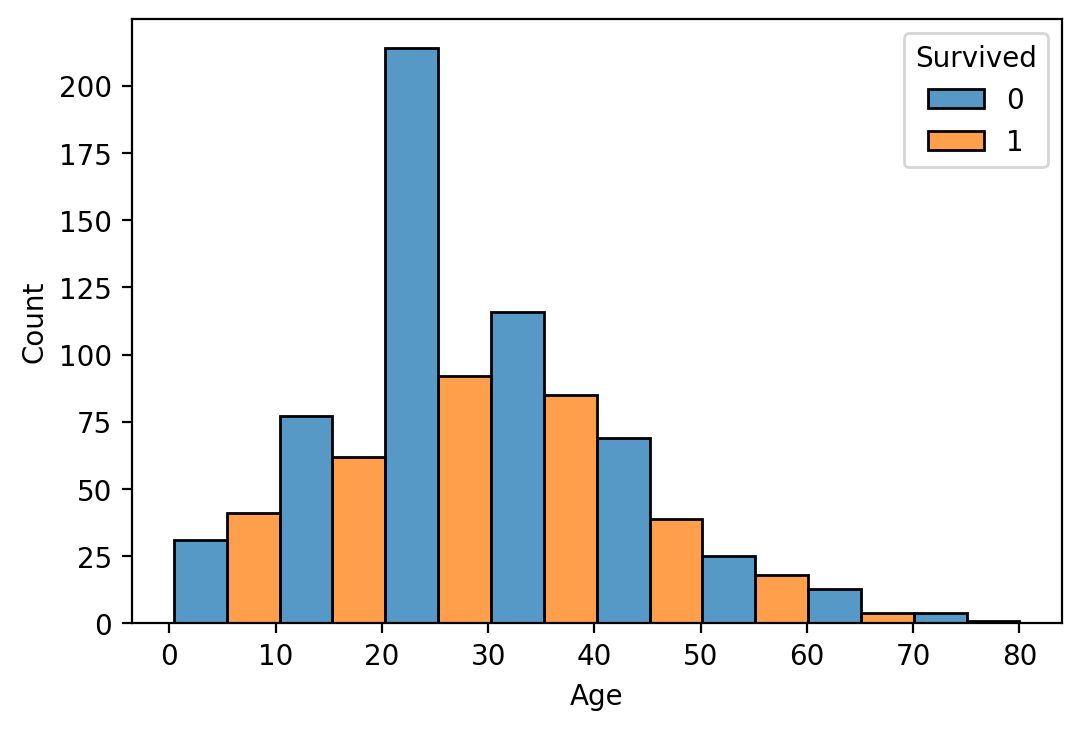

In [31]:
plt.figure(figsize=(6,4),dpi=200)
sns.histplot(x=df_train['Age'], hue=df_train['Survived'],  bins=8,stat='count', multiple='dodge')

- From the above graph we saw that the Children under the Age of 10 were more likely to Survive
while in all other Age group Less people survived than those who died
- As the Age is Increasing the 

## Name

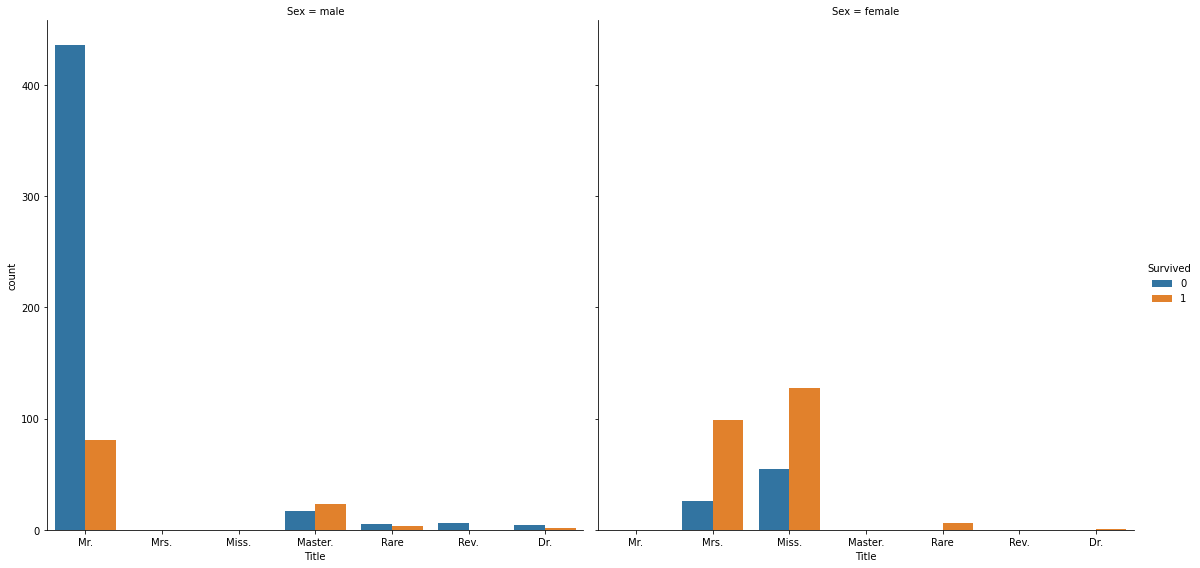

In [32]:
cat_plot(x_col="Title",data=df_train,kind="count",col='Sex')

In [33]:
show_stats('Title',df_train)

         Survived   Died  Total  Survival Rate
Dr.           3.0    4.0    7.0       0.428571
Master.      23.0   17.0   40.0       0.575000
Miss.       127.0   55.0  182.0       0.697802
Mr.          81.0  436.0  517.0       0.156673
Mrs.         99.0   26.0  125.0       0.792000
Rare          9.0    5.0   14.0       0.642857
Rev.          0.0    6.0    6.0       0.000000


- There were around 500 Males with Mr. Title and approx 85% of Them Died
- Female with the Title Mrs. and Miss were having a greater Survival Probability
- Among Females Unmarried Females were having a more Chance of Survival

## Embarked

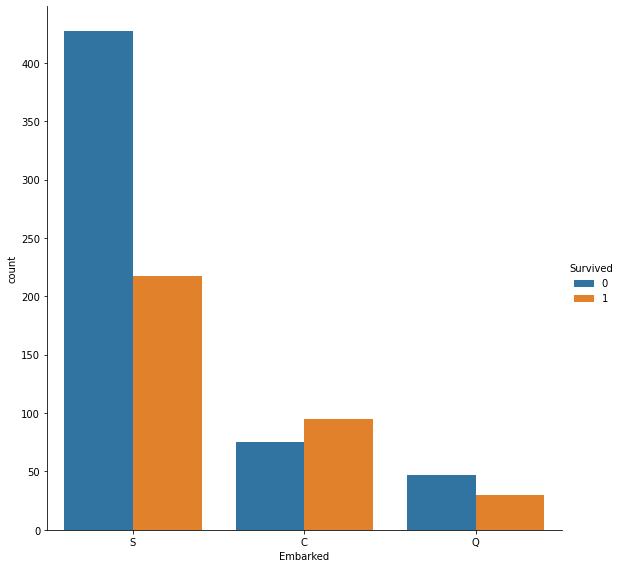

In [34]:
cat_plot(x_col="Embarked",data=df_train,kind="count")

In [35]:
show_stats('Embarked',df_train)

   Survived   Died  Total  Survival Rate
C      95.0   75.0  170.0       0.558824
Q      30.0   47.0   77.0       0.389610
S     217.0  427.0  644.0       0.336957


- Around 70% People were from Southampton
- 67% of the total no. of people died were from those who Embarked from Southampton
- Those who Embarked from Cherbourg were having a greatest chance of Survival (55%)

## Sex

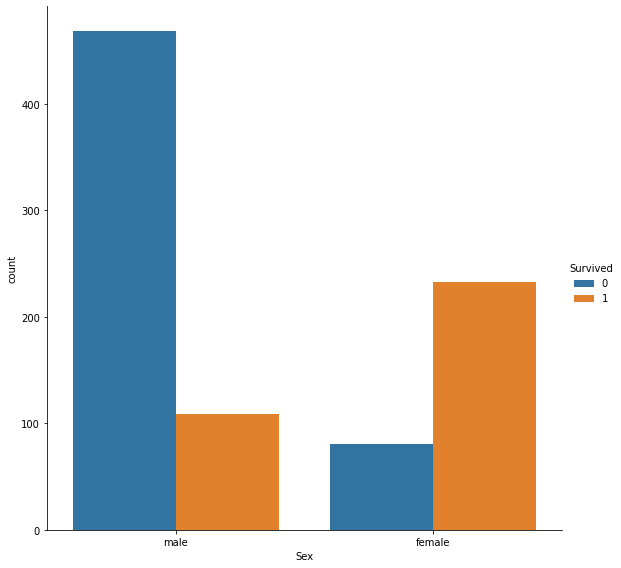

In [36]:
cat_plot(x_col="Sex",data=df_train,kind="count")

In [37]:
show_stats('Sex',df_train)

        Survived   Died  Total  Survival Rate
female     233.0   81.0  314.0       0.742038
male       109.0  468.0  577.0       0.188908


- Females were having a Greater Chance of Survival than Male

# Removing outliners

<AxesSubplot:ylabel='Age'>

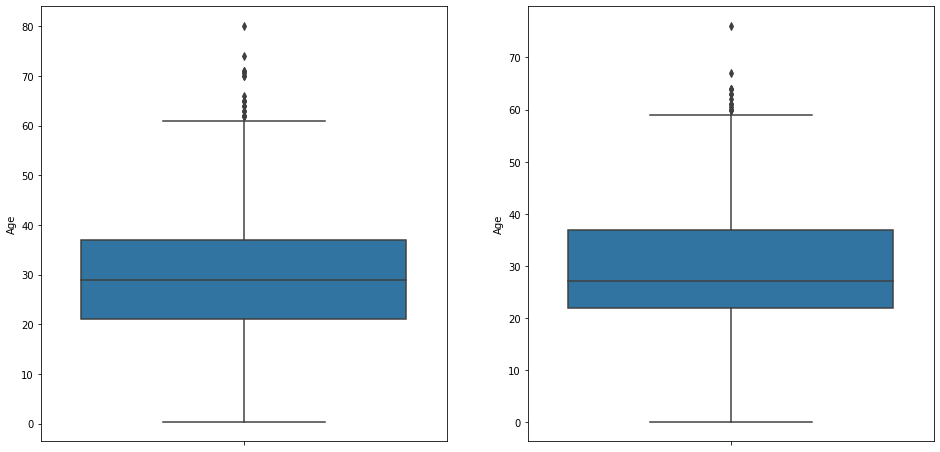

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.boxplot(y='Age',data=df_train,hue=None,ax=axes[0])
sns.boxplot(y='Age',data=df_test,hue=None,ax=axes[1])

<AxesSubplot:ylabel='Fare'>

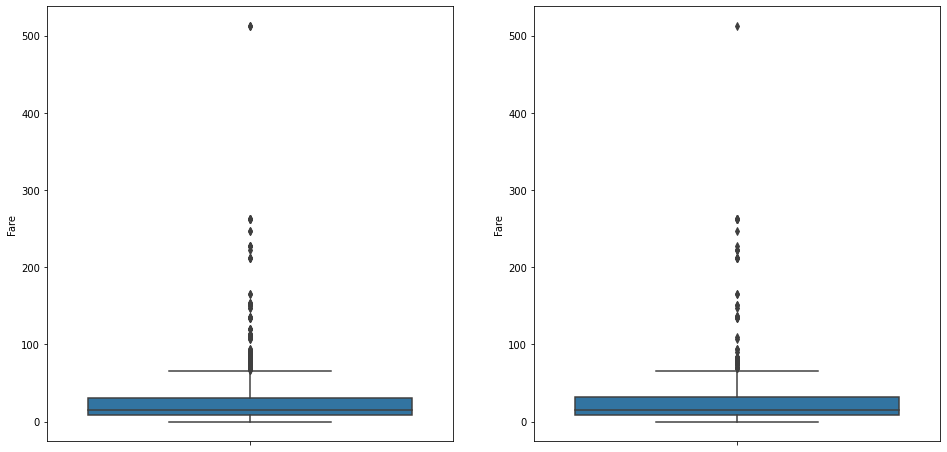

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
sns.boxplot(y='Fare',data=df_train,hue=None,ax=axes[0])
sns.boxplot(y='Fare',data=df_test,hue=None,ax=axes[1])

- We found that there are outliners in both Train and Test Data hence it would not be a good idea to remove them

# Dropping Irrelevant Features

In [40]:
abs(df_train.corr()['Survived']).sort_values()

PassengerId    0.005007
Family         0.016639
SibSp          0.035322
Age            0.080065
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Survived       1.000000
Name: Survived, dtype: float64

In [41]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title', 'Family'],
      dtype='object')

In [42]:
drop_col = ['PassengerId','Name','Family']

In [43]:
df_train.drop(drop_col,axis=1,inplace=True)

In [44]:
df_test.drop(drop_col,axis=1,inplace=True)

In [45]:
df_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [46]:
df_test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

# Encoding

In [47]:
df_train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.


- OneHotEncoding

- Sex, Embarked, Title, Ticket_First_Digit are Nominal Feature hence Doing OneHotEncoding

In [48]:
df_train = pd.get_dummies(df_train, columns=['Sex','Embarked','Title'],drop_first=True)

In [49]:
df_test = pd.get_dummies(df_test, columns=['Sex','Embarked','Title'],drop_first=True)

In [50]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare,Title_Rev.
0,0,3,22.0,1,0,7.2500,1,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,0,1,0,0,0


# Transformation

In [51]:
import scipy.stats as stat


#### Q-Q plot
def plot_data(feature, title=False):
    plt.figure(figsize=(10,6))

    plt.subplot(1,2,1)
    feature.hist()
    plt.title("PDF Plot")
    plt.subplot(1,2,2)
    stat.probplot(feature,dist='norm',plot=plt)
    plt.title("Q-Q Plot")
    if title:
        plt.suptitle(title)

    plt.show()

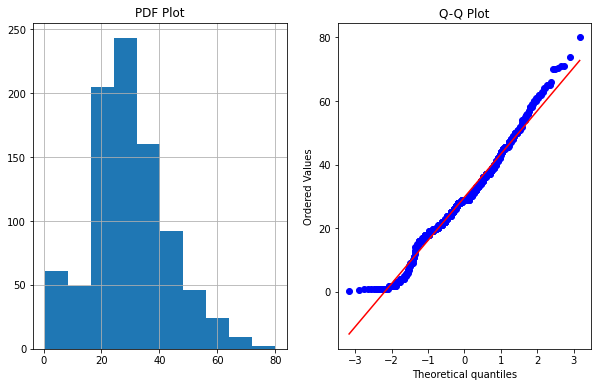

In [52]:
plot_data(df_train['Age'])

- Age is Okay, no need to transform

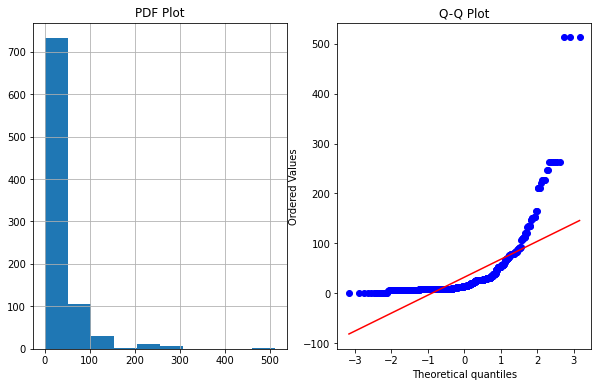

In [53]:
plot_data(df_train['Fare'])

- This looks like right skewed, so let's apply log transformation

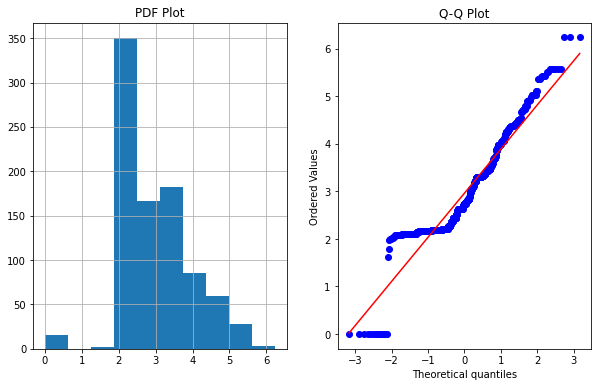

In [54]:
plot_data(np.log(df_train['Fare']+1))

- let's do this transformation in the dataframe

In [55]:
df_train['Fare'] = np.log(df_train['Fare']+1)
df_test['Fare'] = np.log(df_test['Fare']+1)

In [56]:
df_train['Fare'].describe()

count    891.000000
mean       2.962246
std        0.969048
min        0.000000
25%        2.187218
50%        2.737881
75%        3.465736
max        6.240917
Name: Fare, dtype: float64

In [57]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Master.,Title_Miss.,Title_Mr.,Title_Mrs.,Title_Rare,Title_Rev.
0,0,3,22.0,1,0,2.110213,1,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,4.280593,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,2.188856,0,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,3.990834,0,0,1,0,0,0,1,0,0
4,0,3,35.0,0,0,2.202765,1,0,1,0,0,1,0,0,0


In [58]:
df_train.to_csv('data/train_final.csv',index=False)
df_test.to_csv('data/test_final.csv',index=False)